# Task1: Single Layer Neural Network

In [45]:
import util_mnist_reader as mnist_reader
import numpy as np
import sys
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [46]:
def data_initialization():
    X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
    X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
    return X_train, y_train, X_test, y_test

In [47]:
def weight_bias_initialization(number_of_hidden_nodes, number_of_output_nodes, number_of_features):   
    weights1 = np.random.uniform(-1.0, 1.0, size = (number_of_features, number_of_hidden_nodes))          #np.zeros((X_train.shape[1],number_of_hidden_nodes))
    weights2 = np.random.uniform(-1.0, 1.0, size = (number_of_hidden_nodes, number_of_output_nodes))      #np.zeros((number_of_hidden_nodes, number_of_output_nodes))
    bias1 = np.random.randn(number_of_hidden_nodes)
    bias2 = np.random.randn(number_of_output_nodes)
    return weights1, weights2 , bias1, bias2

In [48]:
def softmax(z):
    return np.exp(z)/sum(np.exp(z))

In [49]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [50]:
def sigmoid_derivative(z):
    sg = sigmoid(z)
    return sg * (1 - sg)

In [51]:
def forward_pass(X_train, weights1, weights2, bias1, bias2):
    a1 = sigmoid(X_train.dot(weights1) + bias1) 
    y_predicted = softmax(a1.dot(weights2) + bias2)
    return a1,y_predicted

In [52]:
def loss_calculation(y_train, y_predicted):
    loss = -1/number_of_training_examples*np.sum(y_train * np.log(y_predicted))
    return loss

In [53]:
def back_propogation(X_train, y_train, weights1, weights2 , bias1, bias2):
    dl_db2 = (y_predicted - y_train)
    dl_db1 = ((dl_db2).dot(weights2.T) * a1 * (1 - a1))
    return dl_db1,dl_db2

In [54]:
def gradient_descent(weights1, weights2, bias1, bias2, dl_db1, dl_db2, learning_rate):
    w2 = weights2 - learning_rate * a1.T.dot(dl_db2)
    b2 = bias2 - learning_rate * (dl_db2).sum(axis=0)
    w1 = weights1 - learning_rate * X_train.T.dot(dl_db1)
    b1 = bias1 - learning_rate * (dl_db1).sum(axis=0)
    #print(w1.shape)
    return w1, b1, w2, b2

In [55]:
def predict(X_train, weights1, weights2 , bias1, bias2):
    y1 = sigmoid(X_train.dot(weights1) + bias1) 
    y2 = softmax(y1.dot(weights2) + bias2)
    y_predicted_t = np.argmax(y2, axis=1)
    return y_predicted_t

In [57]:
if __name__ == '__main__':
    X_train, y_train, X_test, y_test = data_initialization()
    number_of_output_nodes = 10
    y_true = y_train
    loss_train = []
    accuracy_train = []
    y_train = np.squeeze(np.eye(number_of_output_nodes)[y_train.reshape(-1)])
    y_test = np.squeeze(np.eye(number_of_output_nodes)[y_test.reshape(-1)])
    number_of_features = X_train.shape[1]
    number_of_hidden_nodes = 512
    number_of_training_examples = X_train.shape[0]
    #number_of_features = X_test.shape[1]
    epoch = 30
    learning_rate = 0.00001
    weights1, weights2 , bias1, bias2 = weight_bias_initialization(number_of_hidden_nodes, number_of_output_nodes, number_of_features)
    for i in range(epoch):
        #print(weights1.shape)
        a1, y_predicted = forward_pass(X_train, weights1, weights2 , bias1, bias2)
        loss = loss_calculation(y_train, y_predicted)
        loss_train.append(loss)
        dl_db1,dl_db2 = back_propogation(X_train, y_train, weights1, weights2 , bias1, bias2)
        weights1, bias1, weights2, bias2 = gradient_descent(weights1, weights2, bias1, bias2, dl_db1, dl_db2, learning_rate)
        if(i%10 == 0):
            print('Loss after iteration# {:d}: {:f}'.format(i, loss))
            predictions = predict(X_train,weights1, weights2, bias1, bias2)
            accuracy1=sum(y_true==predictions)/number_of_training_examples
            accuracy_train.append(accuracy1*100)
            print("Training Accuracy after",i,"iterations:", accuracy1*100)

Loss after iteration# 0: 22.198384
Training Accuracy after 0 iterations: 20.393333333333334
Loss after iteration# 10: 17.597752
Training Accuracy after 10 iterations: 62.55
Loss after iteration# 20: 17.109724
Training Accuracy after 20 iterations: 63.07166666666667


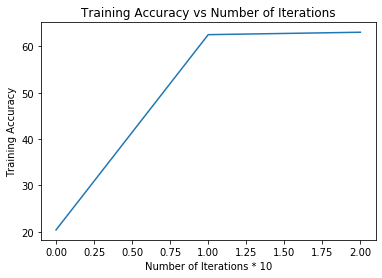

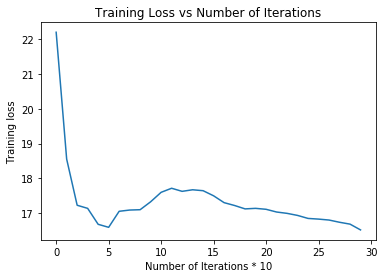

In [58]:
import matplotlib.pyplot as plt

plt.plot(accuracy_train)
plt.title("Training Accuracy vs Number of Iterations")
plt.xlabel("Number of Iterations * 10")
plt.ylabel("Training Accuracy")
plt.show()


plt.plot(loss_train)
plt.title("Training Loss vs Number of Iterations")
plt.xlabel("Number of Iterations * 10")
plt.ylabel("Training loss")
plt.show()

In [60]:
test_samples = X_test.shape[0]
A1_test,A2_test=forward_pass(X_test, weights1, weights2, bias1, bias2)
test_predictions = predict(X_test,weights1, weights2, bias1, bias2)
current_test_accuracy=sum(np.argmax(y_test, axis=1)==test_predictions)/number_of_training_examples
#print("Test Accuracy with the current Model:", current_test_accuracy*100)

In [61]:
from sklearn.metrics import confusion_matrix
confs_matrix = confusion_matrix(np.argmax(y_test, axis = 1), test_predictions)
confs_matrix

array([[714,  11,  13,  72,  30,   2, 148,   1,   9,   0],
       [ 42, 868,   9,  49,  16,   0,  15,   0,   1,   0],
       [ 18,   3, 406,   4, 417,   2, 138,   0,  11,   1],
       [113,  44,   3, 653,  35,   0, 150,   0,   2,   0],
       [ 25,   4, 310,  23, 407,   2, 218,   0,  11,   0],
       [  0,   0,   0,   0,   1, 731,   3, 165,  16,  84],
       [223,   5, 216,  27, 237,   5, 264,   0,  23,   0],
       [  0,   0,   0,   0,   0, 233,   0, 742,   1,  24],
       [  1,   2,  15,  15,  14, 172,  89,  22, 669,   1],
       [  0,   0,   0,   1,   6, 270,   4,  21,  23, 675]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  import sys


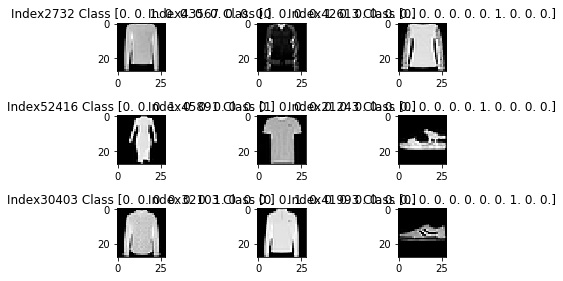

In [43]:
np.random.seed(0);
indices = list(np.random.randint(number_of_training_examples,size=9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index{} Class {}".format(indices[i], y_train[indices[i]]))
    plt.tight_layout()

# Task2: Multilayer Neural Network using Keras

In [2]:
import keras
import tensorflow as tf
import datetime
import os

Using TensorFlow backend.


In [3]:
logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print("successful")

successful


In [5]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [6]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128,activation='sigmoid'), keras.layers.Dense(100,activation='sigmoid'),keras.layers.Dense(10,activation='softmax')])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 114,390
Trainable params: 114,390
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,epochs=80,batch_size=128,validation_data=(x_test,y_test),callbacks=[tensorboard_callback])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples


Epoch 1/80
60000/60000 [==============================] - 1s 23us/step - loss: 2.2579 - acc: 0.3052 - val_loss: 2.1921 - val_acc: 0.4771
Epoch 2/80
60000/60000 [==============================] - 1s 17us/step - loss: 2.1162 - acc: 0.4895 - val_loss: 2.0274 - val_acc: 0.5033
Epoch 3/80
60000/60000 [==============================] - 1s 20us/step - loss: 1.9145 - acc: 0.5200 - val_loss: 1.7987 - val_acc: 0.5527
Epoch 4/80
60000/60000 [==============================] - 1s 19us/step - loss: 1.6880 - acc: 0.5618 - val_loss: 1.5898 - val_acc: 0.5477
Epoch 5/80
60000/60000 [==============================] - 2s 25us/step - loss: 1.5021 - acc: 0.5951 - val_loss: 1.4265 - val_acc: 0.6130
Epoch 6/80
60000/60000 [==============================] - 2s 33us/step - loss: 1.3568 - acc: 0.6330 - val_loss: 1.2991 - val_acc: 0.6401
Epoch 7/80
60000/60000 [=======

60000/60000 [==============================] - 1s 14us/step - loss: 0.5115 - acc: 0.8188 - val_loss: 0.5346 - val_acc: 0.8063
Epoch 54/80
60000/60000 [==============================] - 1s 14us/step - loss: 0.5087 - acc: 0.8192 - val_loss: 0.5321 - val_acc: 0.8089
Epoch 55/80
60000/60000 [==============================] - 1s 16us/step - loss: 0.5061 - acc: 0.8206 - val_loss: 0.5294 - val_acc: 0.8093
Epoch 56/80
60000/60000 [==============================] - 1s 17us/step - loss: 0.5035 - acc: 0.8213 - val_loss: 0.5268 - val_acc: 0.8109
Epoch 57/80
60000/60000 [==============================] - 1s 16us/step - loss: 0.5010 - acc: 0.8219 - val_loss: 0.5257 - val_acc: 0.8106
Epoch 58/80
60000/60000 [==============================] - 1s 17us/step - loss: 0.4987 - acc: 0.8230 - val_loss: 0.5229 - val_acc: 0.8126
Epoch 59/80
60000/60000 [==============================] - 1s 17us/step - loss: 0.4964 - acc: 0.8237 - val_loss: 0.5205 - val_acc: 0.8124
Epoch 60/80
60000/60000 [=====================

In [10]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.4880
Test Accuracy : 0.8240


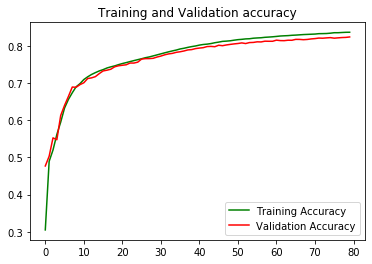

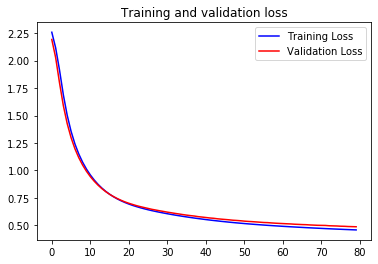

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.utils import plot_model
plot_model(model), to_file='model_task2.png')

In [38]:
from sklearn.metrics import confusion_matrix
score

[0.25596774419546126, 0.9141]

In [ ]:
predict = model.predict(x_test)
predict

In [ ]:
y_pred = (predict > 0.5)
y_pred

In [ ]:
matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

In [ ]:
matrix

# Task3: Convolutional Neural Networks using Keras

In [13]:
import keras
import datetime
import os
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [14]:
logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print("successful")

successful


In [16]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1)
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)

In [17]:
model = keras.Sequential([Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [19]:
tensorboard = TensorBoard(
  log_dir = r'logs\{}'.format('cnn_1layer'),
  write_graph = True,
  write_grads = True,
  histogram_freq=1,
  write_images = True
)

In [20]:
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=50,
    verbose=1,
    validation_data=(x_test,y_test),
    #callbacks = [tensorboard]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 180us/step - loss: 0.6960 - acc: 0.7627 - val_loss: 0.5243 - val_acc: 0.8137
Epoch 2/50
60000/60000 [==============================] - 10s 167us/step - loss: 0.4391 - acc: 0.8458 - val_loss: 0.4204 - val_acc: 0.8518
Epoch 3/50
60000/60000 [==============================] - 9s 158us/step - loss: 0.3959 - acc: 0.8609 - val_loss: 0.3999 - val_acc: 0.8601
Epoch 4/50
60000/60000 [==============================] - 10s 169us/step - loss: 0.3673 - acc: 0.8707 - val_loss: 0.3950 - val_acc: 0.8567
Epoch 5/50
60000/60000 [==============================] - 9s 157us/step - loss: 0.3486 - acc: 0.8785 - val_loss: 0.3512 - val_acc: 0.8783
Epoch 6/50
60000/60000 [==============================] - 10s 168us/step - loss: 0.3314 - acc: 0.8842 - val_loss: 0.3463 - val_acc: 0.8786
Epoch 7/50
60000/60000 [==============================] - 10s 168us/step - loss: 0.3198 - acc: 0.8879 - val_loss: 0.33

In [21]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2560
Test Accuracy : 0.9141


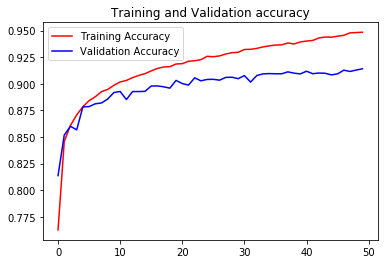

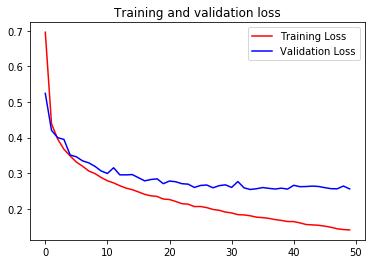

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
from keras.utils import plot_model
plot_model(model, to_file='model_CNN.png')

In [39]:
from sklearn.metrics import confusion_matrix
score

[0.25596774419546126, 0.9141]

In [ ]:
predict = model.predict(x_test)
predict

In [ ]:
y_pred = (predict > 0.5)
y_pred

In [ ]:
matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
matrix